<a href="https://colab.research.google.com/github/marianabetancur18/CNN-Convolutional-neural-network-Cat-breeds/blob/main/CNN_(Convolutional_neural_network)_Cat_breeds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Microproyecto 4

Guia para poder correr esta parte del codigo que tiene que ver con Kaggle, el dataset https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/

Primero se instala Kaggle, pagina de donde se va a extraer el dataset de razas de gatos

In [ ]:
from PIL import Image
import requests
import numpy as np
import pandas as pd
import sklearn.metrics
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from numpy import asarray
from keras import models
from keras import layers
from keras import regularizers
from keras.preprocessing.image import img_to_array
import cv2
from numpy.random import seed
seed(1)
tf.random.set_seed(2)

In [ ]:
! pip install kaggle

Se crea un directorio dentro de este trabajo llamado kaggle

In [ ]:
! mkdir ~/.kaggle

Se copia el archivo .json el cual tiene las credenciales para poder acceder al dataset necesario en kaggle, al directorio creado

In [ ]:
! cp kaggle.json ~/.kaggle/

Se ejecutan los permisos necesario dentro del .json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

Se pasa a descargar el dataset de las razas de gatos encontrado en la pagina web https://www.kaggle.com/ma7555/cat-breeds-dataset

In [ ]:
! kaggle datasets download ma7555/cat-breeds-dataset

100% 1.93G/1.93G [00:20<00:00, 40.0MB/s]



Al descargarse este dataset, hay que tener en cuenta que sus archivos e imagenes vienen comprimidas, por tanto se descomprimen

In [ ]:
! unzip cat-breeds-dataset.zip

Leemos el archivo csv para poder analizar las caracteristicas tomadas para cada una de las imagenes de los gatos dentro de la pagina web

In [ ]:
df = pd.read_csv('/content/data/cats.csv')
df

,Unnamed: 0,id,url,type,age,gender,size,coat,breed,photos,med_photos
0,0,46744842,https://www.petfinder.com/cat/arianna-46744842...,Cat,Adult,Female,Medium,NaN,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
1,1,46717321,https://www.petfinder.com/cat/ozzy-46717321/oh...,Cat,Adult,Male,Extra Large,NaN,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
2,2,46626338,https://www.petfinder.com/cat/zena-46626338/ca...,Cat,Senior,Female,Medium,NaN,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
3,3,46620170,https://www.petfinder.com/cat/mika-46620170/ca...,Cat,Baby,Female,Small,Short,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
4,4,46582751,https://www.petfinder.com/cat/ruby-46582751/fl...,Cat,Young,Female,Medium,NaN,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
...,...,...,...,...,...,...,...,...,...,...,...
67140,70984,43781057,https://www.petfinder.com/cat/jasper-43781057/...,Cat,Baby,Male,Medium,Short,Tuxedo,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
67141,70985,43773439,https://www.petfinder.com/cat/missy-43773439/o...,Cat,Adult,Female,Medium,Short,Tuxedo,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
67142,70986,43773383,https://www.petfinder.com/cat/bandit-43773383/...,Cat,Young,Female,Large,Short,Tuxedo,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
67143,70987,43773168,https://www.petfinder.com/cat/maxy-43773168/ut...,Cat,Adult,Male,Medium,Medium,Tuxedo,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...


## Análisis de features

El dataset multivariado ORDENADO cuenta con 67145 filas (gatos) y 9 features (a primera vista se identifican variables categoricas y discretas), se indagara mas al respecto de los mismos:

1. Unnamed: 0: indice
2. id: codigo de identificación
3. url: pagina web fuente de las imagenes
4. type: tipo de animal que esta representado en la imagen
5. age: etapa de la vida que se encuentra el gato
6. gender: genero del gato
7. size: tamaño categorico del gato
8. coat: tipo de pelaje que presenta el gato
9. breed: raza del gato
10. photos: lista de imagenes agrupadas por tamaño, en donde small es de 100x100 pixeles, medium es de 300x300 pixeles, full es el tamaño original de la imagen.
11. med_photos: link a las imagenes de tamaño mediano


##  Target

Tomaremos las features descritas anteriormente como variables predictoras y como target el feature breed que dice cual es la raza del gato del registro respectivo.
Es decir se busca determinar la raza del gato.

Al desear usar este dataset para la identificacion de razas de los gatos, se hara una limpieza al dataset, primero es eliminar aquellos features que no necesitaremos como lo son el "Unnamed: 0", 'id', 'url', 'age', 'gender', 'size', 'coat' y 'med_photos'.

Se elimina el feature 'med_photos' porque se van a usar las imagenes pequeñas para evitar sobrecargar el proceso

In [ ]:
df = df.drop(columns=["Unnamed: 0", 'id', 'url', 'type', 'age', 'gender', 'size', 'coat', 'med_photos'])

In [ ]:
df

,breed,photos
0,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...
1,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...
2,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...
3,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...
4,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...
...,...,...
67140,Tuxedo,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...
67141,Tuxedo,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...
67142,Tuxedo,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...
67143,Tuxedo,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...


Sabiendo que el dataset nos muestra la clasificacion de 67 razas de gatos, preferimos realizar por motivos de procesamiento usar las razas con mayores registros dentro del dataset y realizar un mejor trabajo en la prediccion de estas

In [ ]:
registrosxraza = df.groupby('breed').agg('count')
registrosxraza = registrosxraza.sort_values('photos', ascending=False)
registrosxraza = registrosxraza[:][:30]
registrosxraza

,photos
breed,
Domestic Short Hair,4049
Persian,3999
Domestic Long Hair,3967
American Shorthair,3964
Domestic Medium Hair,3819
Calico,3389
Dilute Calico,3212
Dilute Tortoiseshell,3144
Siamese,2695


In [ ]:
df = df[df["breed"].isin(['Tuxedo', 'Tiger', 'Siamese', 'Calico', 'Russian Blue'])]
df = df.reset_index(drop= True)
df

,breed,photos
0,Calico,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...
1,Calico,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...
2,Calico,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...
3,Calico,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...
4,Calico,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...
...,...,...
11751,Tuxedo,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...
11752,Tuxedo,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...
11753,Tuxedo,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...
11754,Tuxedo,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...


Ahora seleccionamos 500 fotos de cada clase para nuestro modelo

In [ ]:
for i in range(df.shape[0]):
  if (i != df.shape[0]-1):
    if (df['breed'][i] != df['breed'][i+1]):
      print(i)


3388
5230
7925
9515


In [ ]:
df = df.drop(range(2388), axis=0)
df = df.drop(range(3388,4230), axis=0)
df= df.drop(range(5230,6925), axis=0)
df = df.drop(range(7925,8515), axis=0)
df = df.drop(range(9515,10756), axis=0)

In [ ]:
df

,breed,photos
2388,Calico,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...
2389,Calico,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...
2390,Calico,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...
2391,Calico,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...
2392,Calico,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...
...,...,...
11751,Tuxedo,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...
11752,Tuxedo,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...
11753,Tuxedo,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...
11754,Tuxedo,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...


In [ ]:
df.groupby('breed').agg('count')

,photos
breed,
Calico,1000
Russian Blue,1000
Siamese,1000
Tiger,1000
Tuxedo,1000


Al ser un dataset organizado por raza, se realiza un shuffle, para reacomodar las filas y poder luego separar de una manera mas sencilla cuales son los datos que se usaran para la etapa de entrenamiento y cuales para validar

In [ ]:
df = df.reset_index(drop= True)

In [ ]:
df = shuffle(df)

Se accede solo al link que nos permite ver la imagen pequeña relacionada al gato, eliminando los demas datos del feature photos

In [ ]:
def Convert(string):
    li = list(string.split("'"))
    return li[3]

In [ ]:
df['photos'] = df['photos'].apply(lambda x: Convert(x))
df

,breed,photos
2764,Siamese,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...
4767,Tuxedo,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...
3814,Tiger,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...
3499,Tiger,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...
2735,Siamese,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...
...,...,...
2895,Siamese,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...
2763,Siamese,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...
905,Calico,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...
3980,Tiger,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...


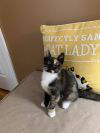

In [ ]:
im = Image.open(requests.get(df['photos'][50], stream=True).raw)
im

##Pre-Procesamiento

Se le asignara un valor numerico a cada raza de gatos para su posterior analisis

*   0, es Siamese
*   1, es Tuxedo
*   2, es Tiger
*   3, es Russian Blue
*   4, es Calico



In [ ]:
breeds = df.breed.unique()

for i in range(df.shape[0]):
  for j in range(len(breeds)):
    if (df['breed'][i]== breeds[j]):
      df['breed'][i]=j
      break
df

,breed,photos
2764,0,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...
4767,1,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...
3814,2,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...
3499,2,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...
2735,0,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...
...,...,...
2895,0,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...
2763,0,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...
905,4,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...
3980,2,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...


In [ ]:
df = df.reset_index(drop= True)

In [ ]:
IMG_WIDTH=100
IMG_HEIGHT=100

Prueba de hacer una transformacion de imagen a arreglo y normalizacion

In [ ]:
Im = Image.open(requests.get(df['photos'][0], stream=True).raw)
Im = cv2.resize(np.float32(Im), (IMG_HEIGHT, IMG_WIDTH), interpolation = cv2.INTER_AREA)
Im = img_to_array(Im)
Im /= 255
df['photos'][0] = Im

In [ ]:
df['photos'][0]

array([[[0.2627451 , 0.21568628, 0.16862746],
        [0.22352941, 0.1764706 , 0.12941177],
        [0.21568628, 0.1764706 , 0.13725491],
        ...,
        [0.8117647 , 0.8039216 , 0.75686276],
        [0.81960785, 0.8117647 , 0.7647059 ],
        [0.8235294 , 0.8156863 , 0.76862746]],

       [[0.2601307 , 0.2130719 , 0.16601306],
        [0.22352941, 0.1764706 , 0.12941177],
        [0.21568628, 0.1764706 , 0.13725491],
        ...,
        [0.8117647 , 0.8039216 , 0.75686276],
        [0.8169935 , 0.80915034, 0.7620915 ],
        [0.8235294 , 0.8156863 , 0.76862746]],

       [[0.25620914, 0.2091503 , 0.1620915 ],
        [0.22091502, 0.1764706 , 0.12941177],
        [0.21699347, 0.17777777, 0.13856208],
        ...,
        [0.8091502 , 0.80130714, 0.7542483 ],
        [0.81437904, 0.8065359 , 0.7594771 ],
        [0.8222222 , 0.81437904, 0.7673202 ]],

       ...,

       [[0.63660127, 0.60130715, 0.5124183 ],
        [0.6522876 , 0.6169934 , 0.52810454],
        [0.6339869 , 0

Se hace el mismo procedimiento para las demas fotos, para asi poderlas procesador dentro del modelo que se va a realizar

In [ ]:
for i in range(1,df.shape[0]):
  try:
    Im = Image.open(requests.get(df['photos'][i], stream=True).raw)
    Im = cv2.resize(np.float32(Im), (IMG_HEIGHT, IMG_WIDTH), interpolation = cv2.INTER_AREA)
    Im = img_to_array(Im)
    Im /= 255.0
    df['photos'][i] = Im
  except Exception as e:
    print(i)

291
595


# Eliminar los valores cuyo enlace no tienen imagen

In [ ]:
df = df.drop(291, axis=0)
df = df.drop(595, axis=0)

Se separan entonces las columnas, y se llevan a una lista, para facilitar los procesos luego, ya que es improductivo solo tener un dataframe que sea de 2 columnas

In [ ]:
labels = list(df['breed'])
photos = list(df['photos'])

**Tamaño de datasets de entrenamiento y prueba (75 % y 25%)**

Separamos los datos entre los que seran usados para el entrenamiento y para la validación

In [ ]:
train_images, test_images, train_labels, test_labels = train_test_split(photos, labels,test_size=0.3, random_state=0)

Numero de datos que seran usados en la fase de entrenamiento

In [ ]:
len(train_labels)

3498

In [ ]:
len(train_images)

3498

In [ ]:
train_images[0].shape

(100, 100, 3)

Numero de datos que seran usados en la fase de prueba

In [ ]:
len(test_images)

1500

# Construccion del modelo

### Configuración de capas

1. Capa de InputLayer, es la primera capa del modelo. Capa usada en este caso para crear un lugar para alojar variables de tensor con un tamaño igual al que tienen nuestras imagener 100x100 pixeles, que contienen 3 valores correspondientes al su codigo RGB normalizado y es el punto de entrada de todo dato del modelo.

2. Capa de Conv2D, capa para realizar convoluciones espaciales sobre imagenes. Esta capa crea un kernel convolucional que es convolucionado con la capa de InputLayer para producir un tensor de salidas. Esta capa tendra 32 filtros los cuales representan la dimensionalidad del espacio de salida, con un tamaño de kernel de 3 que representa el ancho y largo de la ventana convolucional, strides de 2 que significa el numero de saltos que hacer la capa en cada dimension, y la funcion te activacion de relu.

3. Capa de MaxPooling2D, capa encargada de recojer los valores de entrada dadas en este caso por la capa Conv2D y encojerla espacialmente segun el pool_size, en este caso (2,2) por cada canal de entrada, y como resultado de esta capa sale una figura espacial de igual manera.

4. Capa de Conv2D, capa para realizar convoluciones espaciales sobre imagenes. Esta capa crea un kernel convolucional que es convolucionado con la capa de InputLayer para producir un tensor de salidas. Esta capa tendra 64 filtros los cuales representan la dimensionalidad del espacio de salida, con un tamaño de kernel de 3 que representa el ancho y largo de la ventana convolucional, strides de 2 que significa el numero de saltos que hacer la capa en cada dimension, y la funcion te activacion de relu

5. Capa de Flatten, es la capa que se encarga de aplanar los datos que lleguen a esta sin afectar el tamaño para poder ingresarla de una mejor manera a las capas densas.

6. Capa de Dense, capa densa la cual con unas 100 perceptrones y con una funcion de activacion de estos "relu".

7. Capa de Dense, ultima capa de nuestro modelo la cual se encarga de separar las 5 razas de clase con sus 5 perceptrones finales con la funcion de activacion softmax la cual nos permite discriminar de mejor manera entre razas.


In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=2, activation='relu', input_shape=(100,100, 3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=3, strides=2, activation='elu'),
    keras.layers.Flatten(input_shape=(100, 100)),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(5, activation=tf.nn.softmax)
])

Resumen del modelo de manera visual con sus respectivos valores de salida

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 49, 49, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               774500    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 505       
Total params: 794,397
Trainable params: 794,397
Non-trainable params: 0
__________________________________________________

### Compila el modelo

Antes de que el modelo este listo para entrenar, se necesitan unas cuantas configuraciones adicionales. Estas se añaden durante el paso de *compilación*:

* *Optimizer*: Adam 
* *Función loss*: sparse_categorical_crossentropy
* *Metrics*: Accuracy

Nota: Se uso la metrica de exactitud porque no hay necesidad de balancear los datos, ya que se ingreso la cantidad igual de cada una de las clases

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Entrenar el modelo


In [ ]:
history=model.fit(np.array(train_images), np.array(train_labels), epochs=15,validation_data=(np.array(test_images),np.array(test_labels)))

Epoch 1/15
110/110 [==============================] - 9s 78ms/step - loss: 1.4747 - accuracy: 0.3511 - val_loss: 1.3092 - val_accuracy: 0.4747
Epoch 2/15
110/110 [==============================] - 8s 74ms/step - loss: 1.2013 - accuracy: 0.5109 - val_loss: 1.2204 - val_accuracy: 0.5293
Epoch 3/15
110/110 [==============================] - 8s 74ms/step - loss: 1.0127 - accuracy: 0.6006 - val_loss: 1.1208 - val_accuracy: 0.5467
Epoch 4/15
110/110 [==============================] - 8s 74ms/step - loss: 0.8723 - accuracy: 0.6761 - val_loss: 1.1400 - val_accuracy: 0.5633
Epoch 5/15
110/110 [==============================] - 8s 73ms/step - loss: 0.6967 - accuracy: 0.7401 - val_loss: 1.2242 - val_accuracy: 0.5420
Epoch 6/15
110/110 [==============================] - 8s 73ms/step - loss: 0.5059 - accuracy: 0.8285 - val_loss: 1.3996 - val_accuracy: 0.5167
Epoch 7/15
110/110 [==============================] - 8s 74ms/step - loss: 0.3369 - accuracy: 0.8954 - val_loss: 1.4996 - val_accuracy: 0.5427

##Gráficas precision

Se estudia como varia el accuracy tanto del training set como del test set, con la variable del numero de epoch, de esta manera podemos estudaiar el comportanmiento general del modelo y aplicar detencion anticipada para maximizar la presicion. 

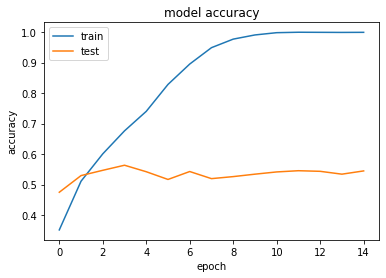

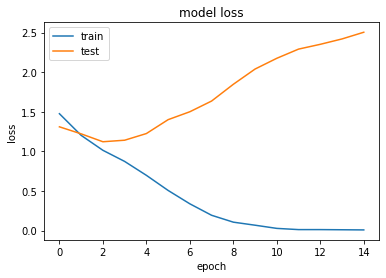

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Evaluar la precisión

Comparar como el modelo se comporta en el dataset de pruebas: En este caso el modelo alcanza su maximo de presicion en el epoch 3, con training accuracy: 0.6398 y - test_accuracy: 0.5480

# Posible overfitting

Con las graficas anteriores podemos darnos cuenta que el modelo, en lo que se refiere a el test set, se esta limitando, y a partir de el epoch 5 el descenso de loss se ve interrumpido y es remplazado por una inclinacion positiva, ademas de que en la grafica de accuraccy nos damos cuenta que mientras el train set va mejorando con cada epoch, el test set esta siendo frenado.
Este comportamiento puede ser debido a un overfitting, lo cual significa que el modelo esta aprendiendose demasiado bien el training set, y con esto limitando el potencial del test set.

Para solucionar el overfitting podemos intentar 3 alternativas:

-Reducir la capacidad de el modelo eliminando capas o reduciendo la cantidad de elementos en las capas ocultas

-Aplicar regularización, que se reduce a agregar un costo a la función de pérdida para pesos grandes

-Uso de capas de exclusión, que eliminarán aleatoriamente ciertas características al establecerlas en cero

# Detención anticipada

Como  forma general de intentar mejorar el rendimiento contra el overfitting, utlizamos la detención anticipada.

Cuando entrena un algoritmo de aprendizaje de forma iterativa, puede medir el rendimiento de cada iteración del modelo,lo cual se ve representado en las graficas de epochs.

Hasta cierto número de iteraciones, las nuevas iteraciones mejoran el modelo. Sin embargo, después de ese punto, la capacidad del modelo para generalizar puede debilitarse a medida que comienza a sobreajustarse a los datos de entrenamiento.

La detención anticipada se refiere a detener el modelo en el epoch optimo antes de que el modelo pase este punto.

# Reducir la capacidad de la red
Para implementar esta posible solucion simplemente cambiamos la ultima capa de Dense, y en vez de los 100 perceptrones que contenia anteriormente, le agregamos solo 16, de esta manera se le disminuye la potencia al modelo, y se espera que no memorice al extremo el training set 

In [ ]:
Reduced_model = keras.Sequential([
     keras.layers.Conv2D(filters=32, kernel_size=3, strides=2, activation='relu', input_shape=(100,100, 3)),
      keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=3, strides=2, activation='elu'),
    keras.layers.Flatten(input_shape=(100, 100)),                             
     keras.layers.Dense(16, activation='relu'),
     keras.layers.Dense(5, activation='softmax')
])
Reduced_model.summary()
Reduced_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 49, 49, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                123920    
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 85        
Total params: 143,397
Trainable params: 143,397
Non-trainable params: 0
________________________________________________

In [ ]:
Reduced_history=Reduced_model.fit(np.array(train_images), np.array(train_labels), epochs=15,validation_data=(np.array(test_images),np.array(test_labels)))

Epoch 1/15
110/110 [==============================] - 8s 71ms/step - loss: 1.5621 - accuracy: 0.2584 - val_loss: 1.5078 - val_accuracy: 0.3307
Epoch 2/15
110/110 [==============================] - 8s 69ms/step - loss: 1.4526 - accuracy: 0.3622 - val_loss: 1.4252 - val_accuracy: 0.3867
Epoch 3/15
110/110 [==============================] - 8s 69ms/step - loss: 1.3701 - accuracy: 0.4191 - val_loss: 1.3600 - val_accuracy: 0.4260
Epoch 4/15
110/110 [==============================] - 8s 71ms/step - loss: 1.2552 - accuracy: 0.4734 - val_loss: 1.2404 - val_accuracy: 0.4700
Epoch 5/15
110/110 [==============================] - 8s 69ms/step - loss: 1.1600 - accuracy: 0.5212 - val_loss: 1.2671 - val_accuracy: 0.4667
Epoch 6/15
110/110 [==============================] - 8s 68ms/step - loss: 1.0828 - accuracy: 0.5603 - val_loss: 1.2218 - val_accuracy: 0.5067
Epoch 7/15
110/110 [==============================] - 7s 68ms/step - loss: 0.9711 - accuracy: 0.6172 - val_loss: 1.2549 - val_accuracy: 0.4980

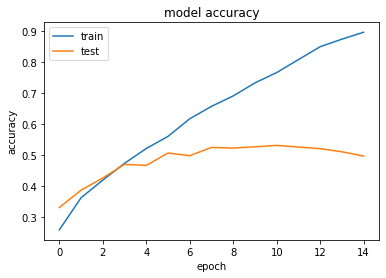

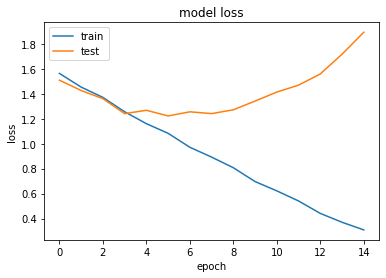

In [ ]:
plt.plot(Reduced_history.history['accuracy'])
plt.plot(Reduced_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(Reduced_history.history['loss'])
plt.plot(Reduced_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Como cada modelo cambia sus rendimientos cada vez que se ejecuta, no podemos hacer conclusiones especificas acerca del desempeno de estos modelos, sin embargo se pueden establecer algunos patrones que se observaron en la mayoria de ejecuciones

En este caso de reducir la capacidad de la red, tiende a ser mas efectiva que el modelo original, sin embargo no presenta diferencias significativas en cuanto a maximos de precision, lo que si es evidente y se aprecia en la mayoria de situaciones es que la variable loss no detiene su decrecimiento tan temprano como en el modelo original, por lo que se puede decir que retarda el overfitting, requiriendo mas epochs para empezar a aumentar la variable loss en el test set.

# Regularización
Para solucionar el overfitting, podemos aplicar la regularización de peso al modelo. Esto agregará un costo a la función de pérdida de la red para pesos grandes (o valores de parámetros). Como resultado, obtiene un modelo más simple que se verá obligado a aprender solo los patrones relevantes en los datos de entrenamiento.
Hay regularización L1 y regularización L2.
La regularización L1 agregará un costo con respecto al valor absoluto de los parámetros. Dará como resultado que algunos de los pesos sean iguales a cero.
La regularización L2 agregará un costo con respecto al valor al cuadrado de los parámetros. Esto da como resultado pesos más pequeños.
Probemos con la regularización L2.


In [ ]:
Regulated_model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=2, activation='relu', input_shape=(100,100, 3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=3, strides=2, activation='elu'),
    keras.layers.Flatten(input_shape=(100, 100)),
    keras.layers.Dense(100, kernel_regularizer=regularizers.l2(0.001),activation=tf.nn.relu),
    keras.layers.Dense(5, activation=tf.nn.softmax)
])
Regulated_model.summary()
Regulated_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 49, 49, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
flatten_2 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               774500    
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 505       
Total params: 794,397
Trainable params: 794,397
Non-trainable params: 0
________________________________________________

In [ ]:
Regulated_model=Regulated_model.fit(np.array(train_images), np.array(train_labels), epochs=15,validation_data=(np.array(test_images),np.array(test_labels)))

Epoch 1/15
110/110 [==============================] - 9s 77ms/step - loss: 1.5613 - accuracy: 0.3848 - val_loss: 1.3854 - val_accuracy: 0.4727
Epoch 2/15
110/110 [==============================] - 8s 75ms/step - loss: 1.2783 - accuracy: 0.5314 - val_loss: 1.2935 - val_accuracy: 0.5273
Epoch 3/15
110/110 [==============================] - 8s 76ms/step - loss: 1.1368 - accuracy: 0.5946 - val_loss: 1.2207 - val_accuracy: 0.5560
Epoch 4/15
110/110 [==============================] - 8s 76ms/step - loss: 1.0647 - accuracy: 0.6404 - val_loss: 1.2304 - val_accuracy: 0.5620
Epoch 5/15
110/110 [==============================] - 8s 76ms/step - loss: 0.9802 - accuracy: 0.6850 - val_loss: 1.2645 - val_accuracy: 0.5713
Epoch 6/15
110/110 [==============================] - 8s 76ms/step - loss: 0.9001 - accuracy: 0.7316 - val_loss: 1.3665 - val_accuracy: 0.5533
Epoch 7/15
110/110 [==============================] - 8s 76ms/step - loss: 0.8378 - accuracy: 0.7733 - val_loss: 1.3962 - val_accuracy: 0.5613

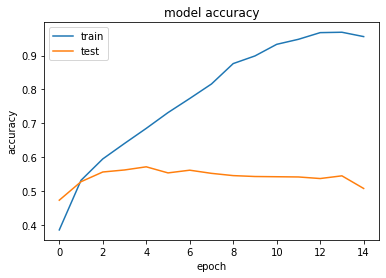

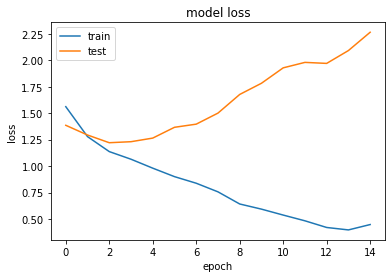

In [ ]:
plt.plot(Regulated_model.history['accuracy'])
plt.plot(Regulated_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(Regulated_model.history['loss'])
plt.plot(Regulated_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Con el modelo de regularizacion ocurre algo similar, este tiende a dar mejores resultados de accuracy que el modelo original pero solo en los primeros epochs, despues de esto empieza a mostrar overfitting casi en el mismo punto que su contraparte. En algunas ocasiones incluso se puede verificar que la variable loss incrementa a menor ritmo, por lo que desacelera el overfitting en cierta medida.

# Agregar capas de exclusion
La última opción que intentaremos es agregar capas de exclusión. Una capa Dropout establecerá aleatoriamente las características de salida de una capa en cero.

In [ ]:
Drop_model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=2, activation='relu', input_shape=(100,100, 3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=3, strides=2, activation='elu'),
    keras.layers.Flatten(input_shape=(100, 100)),
    keras.layers.Dense(100,activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(5, activation=tf.nn.softmax)
])
Drop_model.summary()
Drop_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 49, 49, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
flatten_3 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               774500    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 5)                

In [ ]:
Drop_model=Drop_model.fit(np.array(train_images), np.array(train_labels), epochs=15,validation_data=(np.array(test_images),np.array(test_labels)))

Epoch 1/15
110/110 [==============================] - 9s 75ms/step - loss: 1.4843 - accuracy: 0.3393 - val_loss: 1.3498 - val_accuracy: 0.4507
Epoch 2/15
110/110 [==============================] - 8s 73ms/step - loss: 1.2759 - accuracy: 0.4817 - val_loss: 1.1931 - val_accuracy: 0.5133
Epoch 3/15
110/110 [==============================] - 8s 73ms/step - loss: 1.1062 - accuracy: 0.5603 - val_loss: 1.1055 - val_accuracy: 0.5493
Epoch 4/15
110/110 [==============================] - 8s 73ms/step - loss: 1.0122 - accuracy: 0.6103 - val_loss: 1.1036 - val_accuracy: 0.5507
Epoch 5/15
110/110 [==============================] - 8s 72ms/step - loss: 0.9180 - accuracy: 0.6447 - val_loss: 1.1424 - val_accuracy: 0.5633
Epoch 6/15
110/110 [==============================] - 8s 73ms/step - loss: 0.8122 - accuracy: 0.6915 - val_loss: 1.1495 - val_accuracy: 0.5513
Epoch 7/15
110/110 [==============================] - 8s 72ms/step - loss: 0.7029 - accuracy: 0.7410 - val_loss: 1.2502 - val_accuracy: 0.5507

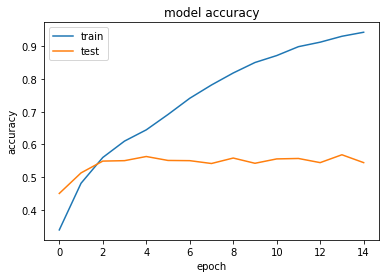

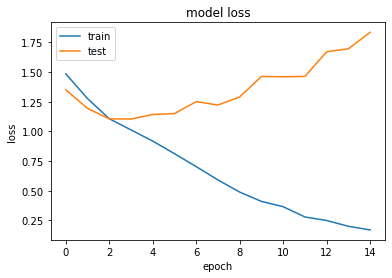

In [ ]:
plt.plot(Drop_model.history['accuracy'])
plt.plot(Drop_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(Drop_model.history['loss'])
plt.plot(Drop_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Por ultimo el modelo que hace uso de las capas dropout, tambien tiende a mostrar mejores valores que el modelo original, sobretodo en sus primeros epochs, ademas de que tambien empieza a desarrollar overfitting un poco mas tarde que su contraparte pero con un avance mucho menor.


# Conclusiones

Como en cada ejecucion del codigo cambia dastricamente los resultados (se intento controlar esto agregando una semilla para el random,no obstante los resultados siguieron cambiando con cada ejecucion, tambien se intento correr cada modelo multiples veces y sacar un promedio de resultados, pero el costo computacional de esto fue demasiado por lo que no se pudo implementar, por lo que se decidio hacer conclusiones generales sin especificar ningun caso), no se puede concluir que modelo va a ser mejor para cada situacion en especifico, sin embargo se puede observar como conclusion general que casi todos los modelos tienden a mejorar aunque sea en 2-5% los maximos de exactitud mostrados por el modelo original, pero sin solucionar del todo el problema de overfitting, siendo el mayor logro de estos retrasarlo un poco, o disminuir la tasa con la que incrementa la variable loss. 
Aplicando la detencion anticipada y utilizando las graficas de cada modelo, podemos escoger el modelo que mejor se comporte con el numero de epochs correspondiente para maximizar su precision.

Para definir el modelo final, y por la situacion explicada con anterioridad de la aleatoriedad de los resultados, decidimos escoger el modelo con regularizacion que tiende a dar muy buenos resultados si lo entrenamos hasta el epoch 4-5

In [ ]:
final_model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=2, activation='relu', input_shape=(100,100, 3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=3, strides=2, activation='elu'),
    keras.layers.Flatten(input_shape=(100, 100)),
    keras.layers.Dense(100, kernel_regularizer=regularizers.l2(0.001),activation=tf.nn.relu),
    keras.layers.Dense(5, activation=tf.nn.softmax)
])
final_model.summary()
final_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 49, 49, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
flatten_5 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               774500    
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 505       
Total params: 794,397
Trainable params: 794,397
Non-trainable params: 0
________________________________________________

In [ ]:
final_model1=final_model.fit(np.array(train_images), np.array(train_labels), epochs=4,validation_data=(np.array(test_images),np.array(test_labels)))

Epoch 1/4
110/110 [==============================] - 9s 78ms/step - loss: 1.5832 - accuracy: 0.3825 - val_loss: 1.4371 - val_accuracy: 0.4353
Epoch 2/4
110/110 [==============================] - 8s 77ms/step - loss: 1.3173 - accuracy: 0.4997 - val_loss: 1.3554 - val_accuracy: 0.4980
Epoch 3/4
110/110 [==============================] - 8s 76ms/step - loss: 1.1910 - accuracy: 0.5789 - val_loss: 1.2687 - val_accuracy: 0.5267
Epoch 4/4
110/110 [==============================] - 8s 76ms/step - loss: 1.1026 - accuracy: 0.6221 - val_loss: 1.2510 - val_accuracy: 0.5660


#Matriz de confusión

In [ ]:
predictions = final_model.predict(np.array(test_images))

In [ ]:
type(np.array(train_labels))

numpy.ndarray

Confusion Matrix


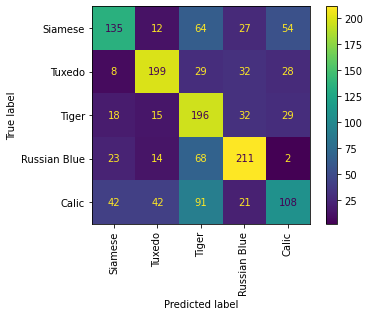

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
y_pred = np.argmax(predictions, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(np.array(test_labels), y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Siamese","Tuxedo","Tiger","Russian Blue","Calic"])
disp.plot(xticks_rotation='vertical', values_format='d')

##Analisis preliminar
- La raza de gatos que peor se comporto fue calic, el modelo a menudo lo confundio con la raza tiger

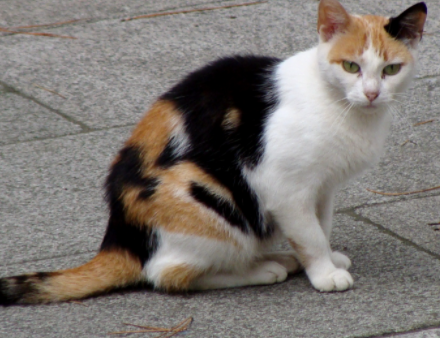



Como se aprecia en al imagen anterior de un gato calic, este tiene un pelaje muy similar al de un tiger, este error probablemente se podia solucionar al agregar mas imagenes al dataset.
Siamese es tambien un gato con parches negros en las patas y cola, aunque no esta en todo su cuerpo, tambien se hicieron predicciones de este como tiger.

## Metricas

In [ ]:
from sklearn.metrics import classification_report
y_pred
np.array(test_labels)
print(classification_report(np.array(test_labels),y_pred))


              precision    recall  f1-score   support

           0       0.60      0.46      0.52       292
           1       0.71      0.67      0.69       296
           2       0.44      0.68      0.53       290
           3       0.65      0.66      0.66       318
           4       0.49      0.36      0.41       304

    accuracy                           0.57      1500
   macro avg       0.58      0.57      0.56      1500
weighted avg       0.58      0.57      0.56      1500



## Precision
- Para la clase 0 el 60% de los datos predichos como siamese eran realmente de esta raza.
-Para la clase 1 el 71% de los datos predichos como tuxedo eran realmente de esta raza.
-Para la clase 2 el 44% de los datos predichos como tiger eran realmente de esta raza.
-Para la clase 3 el 65% de los datos predichos como russian blue eran realmente de esta raza.
-Para la clase 4 el 49% de los datos predichos como calic eran realmente de esta raza.

## Recall

- De todos los gatos de raza siamese el modelo solo califico como tipo 0 el 46% de ellos.
- De todos los gatos de raza tuxedo el modelo solo califico como tipo 1 el 67% de ellos.
- De todos los gatos de raza tiger el modelo solo califico como tipo 2 el 68% de ellos.
- De todos los gatos de raza russian blue el modelo solo califico como tipo 3 el 66% de ellos.
- De todos los gatos de raza calic el modelo solo califico como tipo 4 el 36% de ellos.

## F1 Scores

-  De las 5 razas, la que mejor matiene el equilibrio entre recall y precision es la clase 1, la raza tuxedo


## ¿ Es bueno el modelo?
Dada la cantidad de imagenes el modelo se comporta relativamente bien, es muy sensible al overfiting. Es probable que con mas imagenes aumente sus resultados positivos

